# Data Analysis

About this file
This is dataset useful for HR in a company. A company records different parameters of an employee (such as satisfaction level, Salary, number of promotion, left the company etc.) .

This dataset can be used to predict whether an employee leave the company or stay in the company.

Dataset explanation : <br>
1. satisfaction_level = satisfaction level at job of an employee
2. last_evaluation = Rating between 0 to 1, received by an employee at his last evaluation
3. number_project = Number of projects, an employee involved in
4. average_montly_hours = Average number of hours in a month, spent by an employee at office
5. time_spend_company = Number of years spent in the company
6. Work_accident = 0 - no accident during employee stay, 1 - accident during employee stay
7. left = 0 indicates employee stays in the company, 1 indicates - employee left the company
8. promotion_last_5years = Number of promotions in his stay
9. Department = Department, an employee belongs to
10. salary = Salary in USD

# Data Preparation

Preparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `HR_comma_sep.csv` sebelum tahap pemodelan :
1. Import Library
2. Input Dataset
3. Preprocessing
4. Train-Test Split

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

## Input Dataset

In [ ]:
df = pd.read_csv('HR_comma_sep.csv')

In [ ]:
df.sample(5)

satisfaction_level  last_evaluation  number_project  \
5982                 0.17             0.73               4   
4876                 0.80             0.93               3   
14657                0.44             0.46               2   
2230                 0.93             0.80               4   
1012                 0.10             0.87               6   

       average_montly_hours  time_spend_company  Work_accident  left  \
5982                    274                   3              0     0   
4876                    260                   3              0     0   
14657                   143                   3              0     1   
2230                    248                   3              0     0   
1012                    284                   4              0     1   

       promotion_last_5years        sales  salary  
5982                       0   accounting    high  
4876                       0  product_mng     low  
14657                      0           IT     low  
2230                       0        sales     low  
1012                       0        sales  medium

In [ ]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

# Data Cleaning
*to check data type, missing data, and outlier

There is no missing data, so we can proceed to encoding categorical features.

It is to expect that the target should depend on the salary. An employee with lower salary should have bigger probability to leave. This is also indicated in the diagram below.

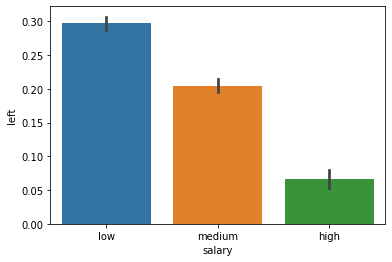

In [ ]:
sns.barplot(x=df.salary, y=df.left, order=['low', 'medium', 'high'])

Therefore it makes sense to use the label encoder with low, medium, and high salary being converted to 0, 1, and 2 respectively.

# Data Visualization

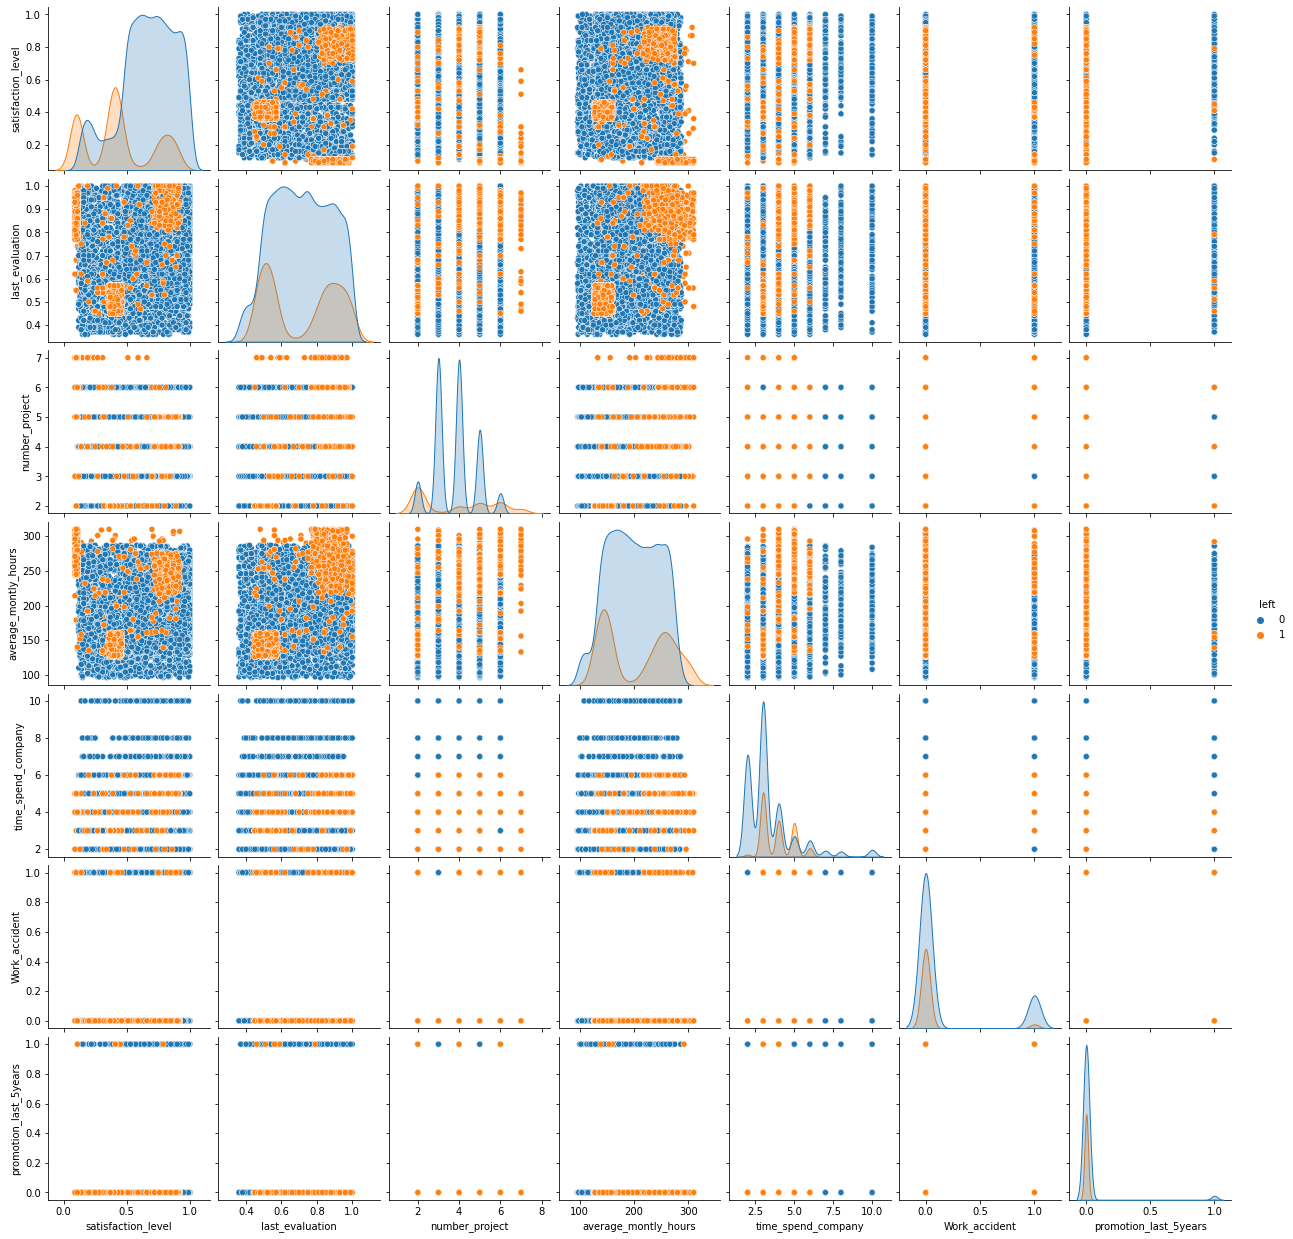

In [ ]:
sns.pairplot(data=df, hue='left')

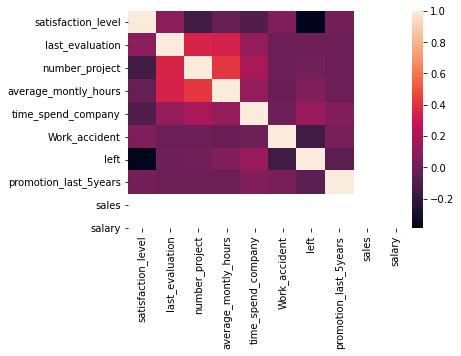

In [ ]:
sns.heatmap(df.corr(), 
        xticklabels=df.columns,
        yticklabels=df.columns)

In [ ]:
%%capture
!pip install autoviz


In [ ]:
import pandas as pd 
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported v0.1.58. After importing, execute '%matplotlib inline' to display charts in Jupyter.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Update: verbose=0 displays charts in your local Jupyter notebook.
        verbose=1 additionally provides EDA data cleaning suggestions. It also displays charts.
        verbose=2 does not display charts but saves them in AutoViz_Plots folder in local machine.
        chart_format='bokeh' displays charts in your local Jupyter notebook.
        chart_format='server' displays charts in your browser: one tab for each chart type
        chart_format='html' silently saves interactive HTML files in your local machine


Shape of your Data Set loaded: (14999, 10)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    10 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 3
All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years    sales  salary  
0                          0    sales     low  
1                          0    sales  medium  
2                          0    sales  medium  
3                          0    sales     low  
4                          0    sales     low  
...                      ...      ...     ...  
14994                      0  support     low  
14995                      0  support     low  
14996                      0  support     low  
14997                      0  support     low  
14998                      0  support     low  

[14999 rows x 10 columns]

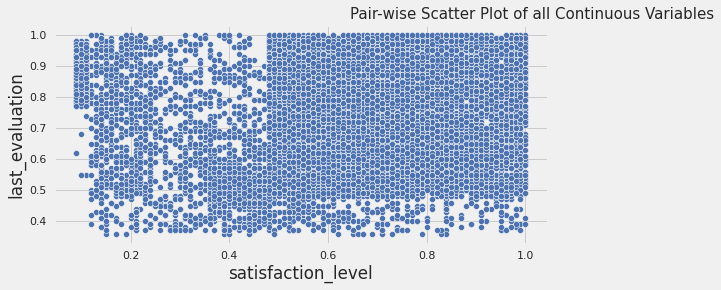

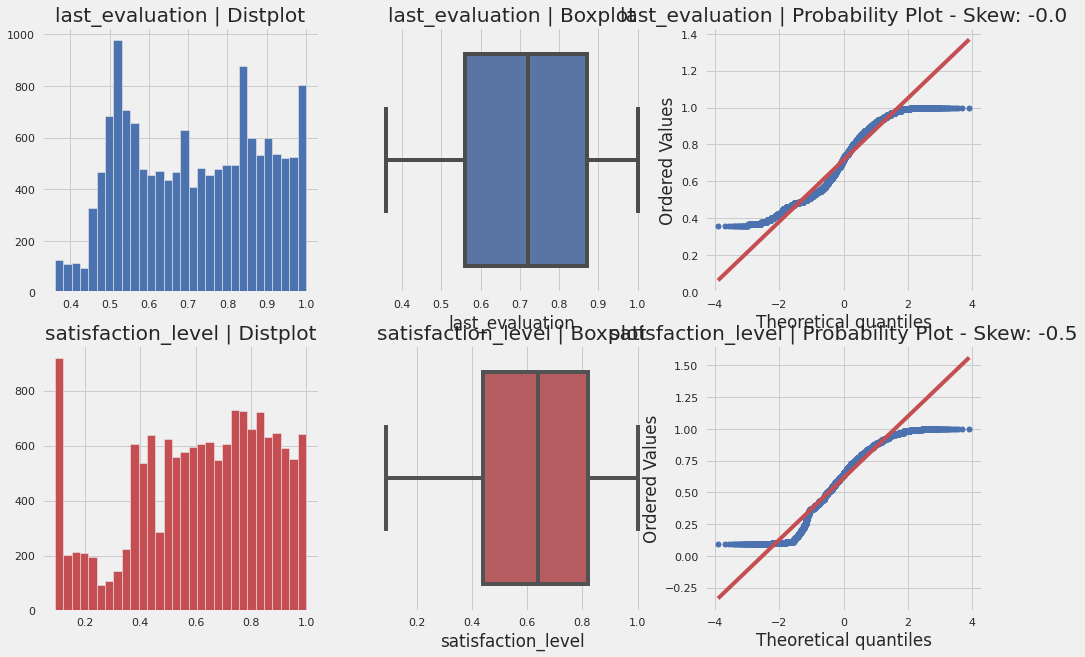

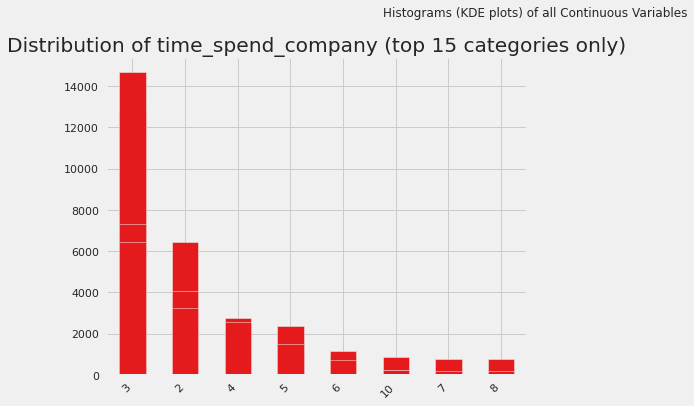

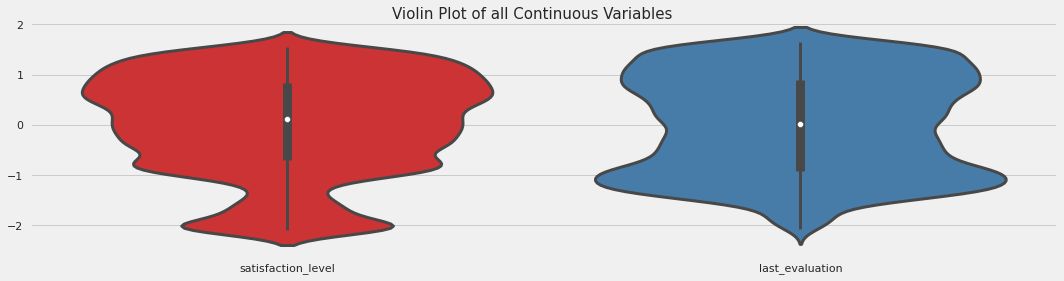

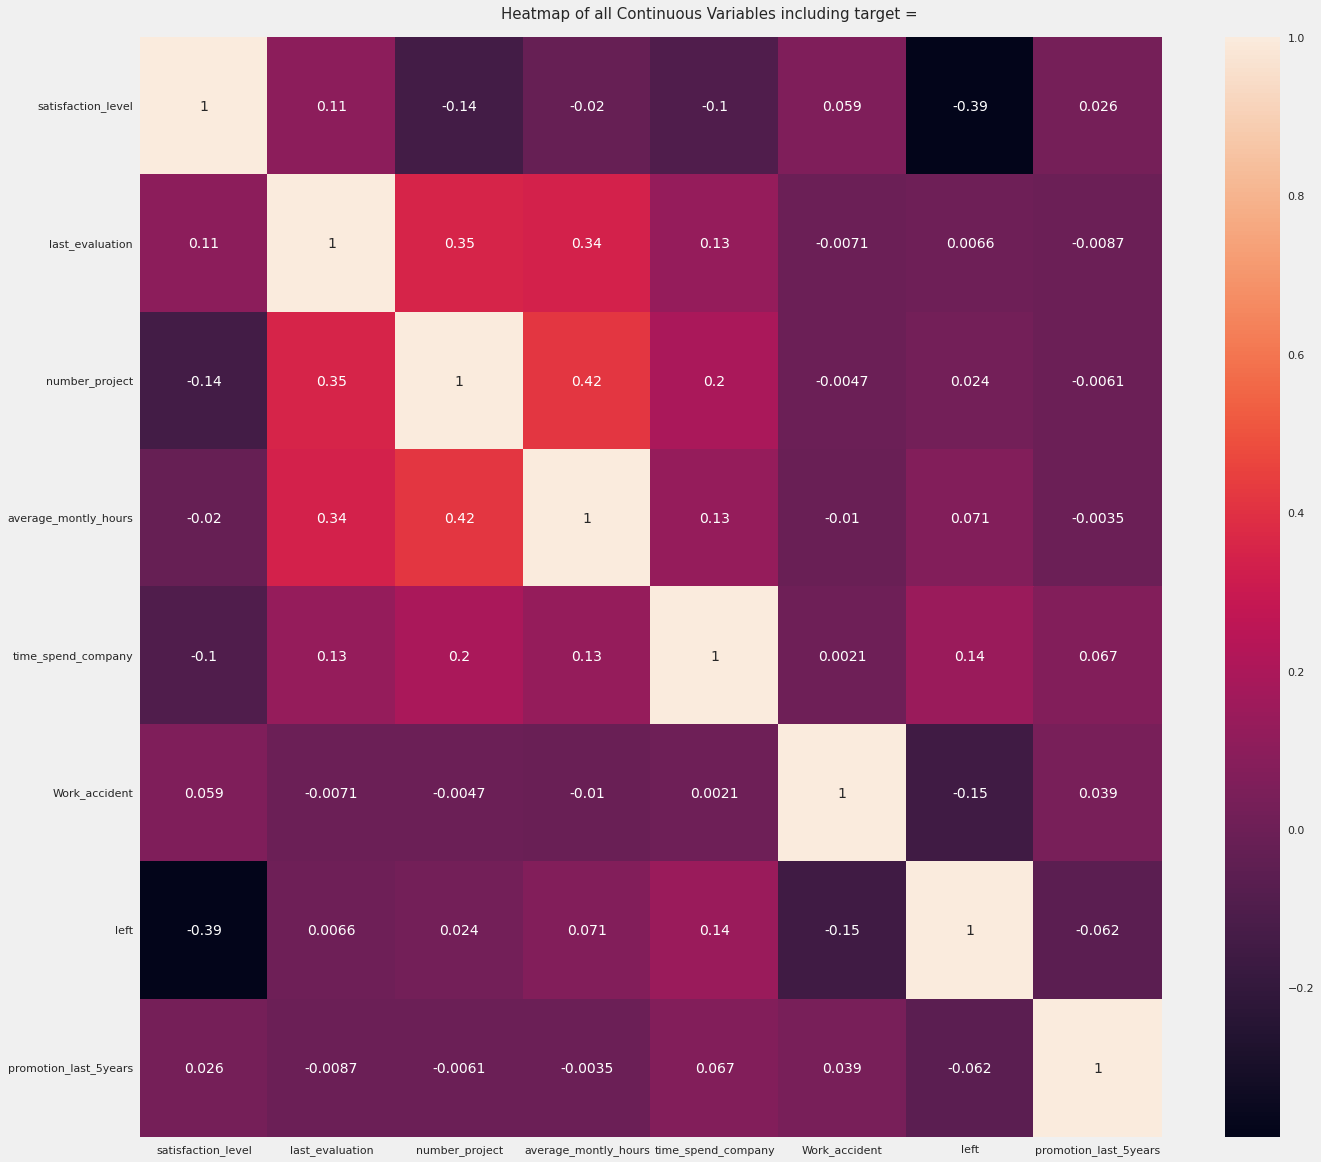

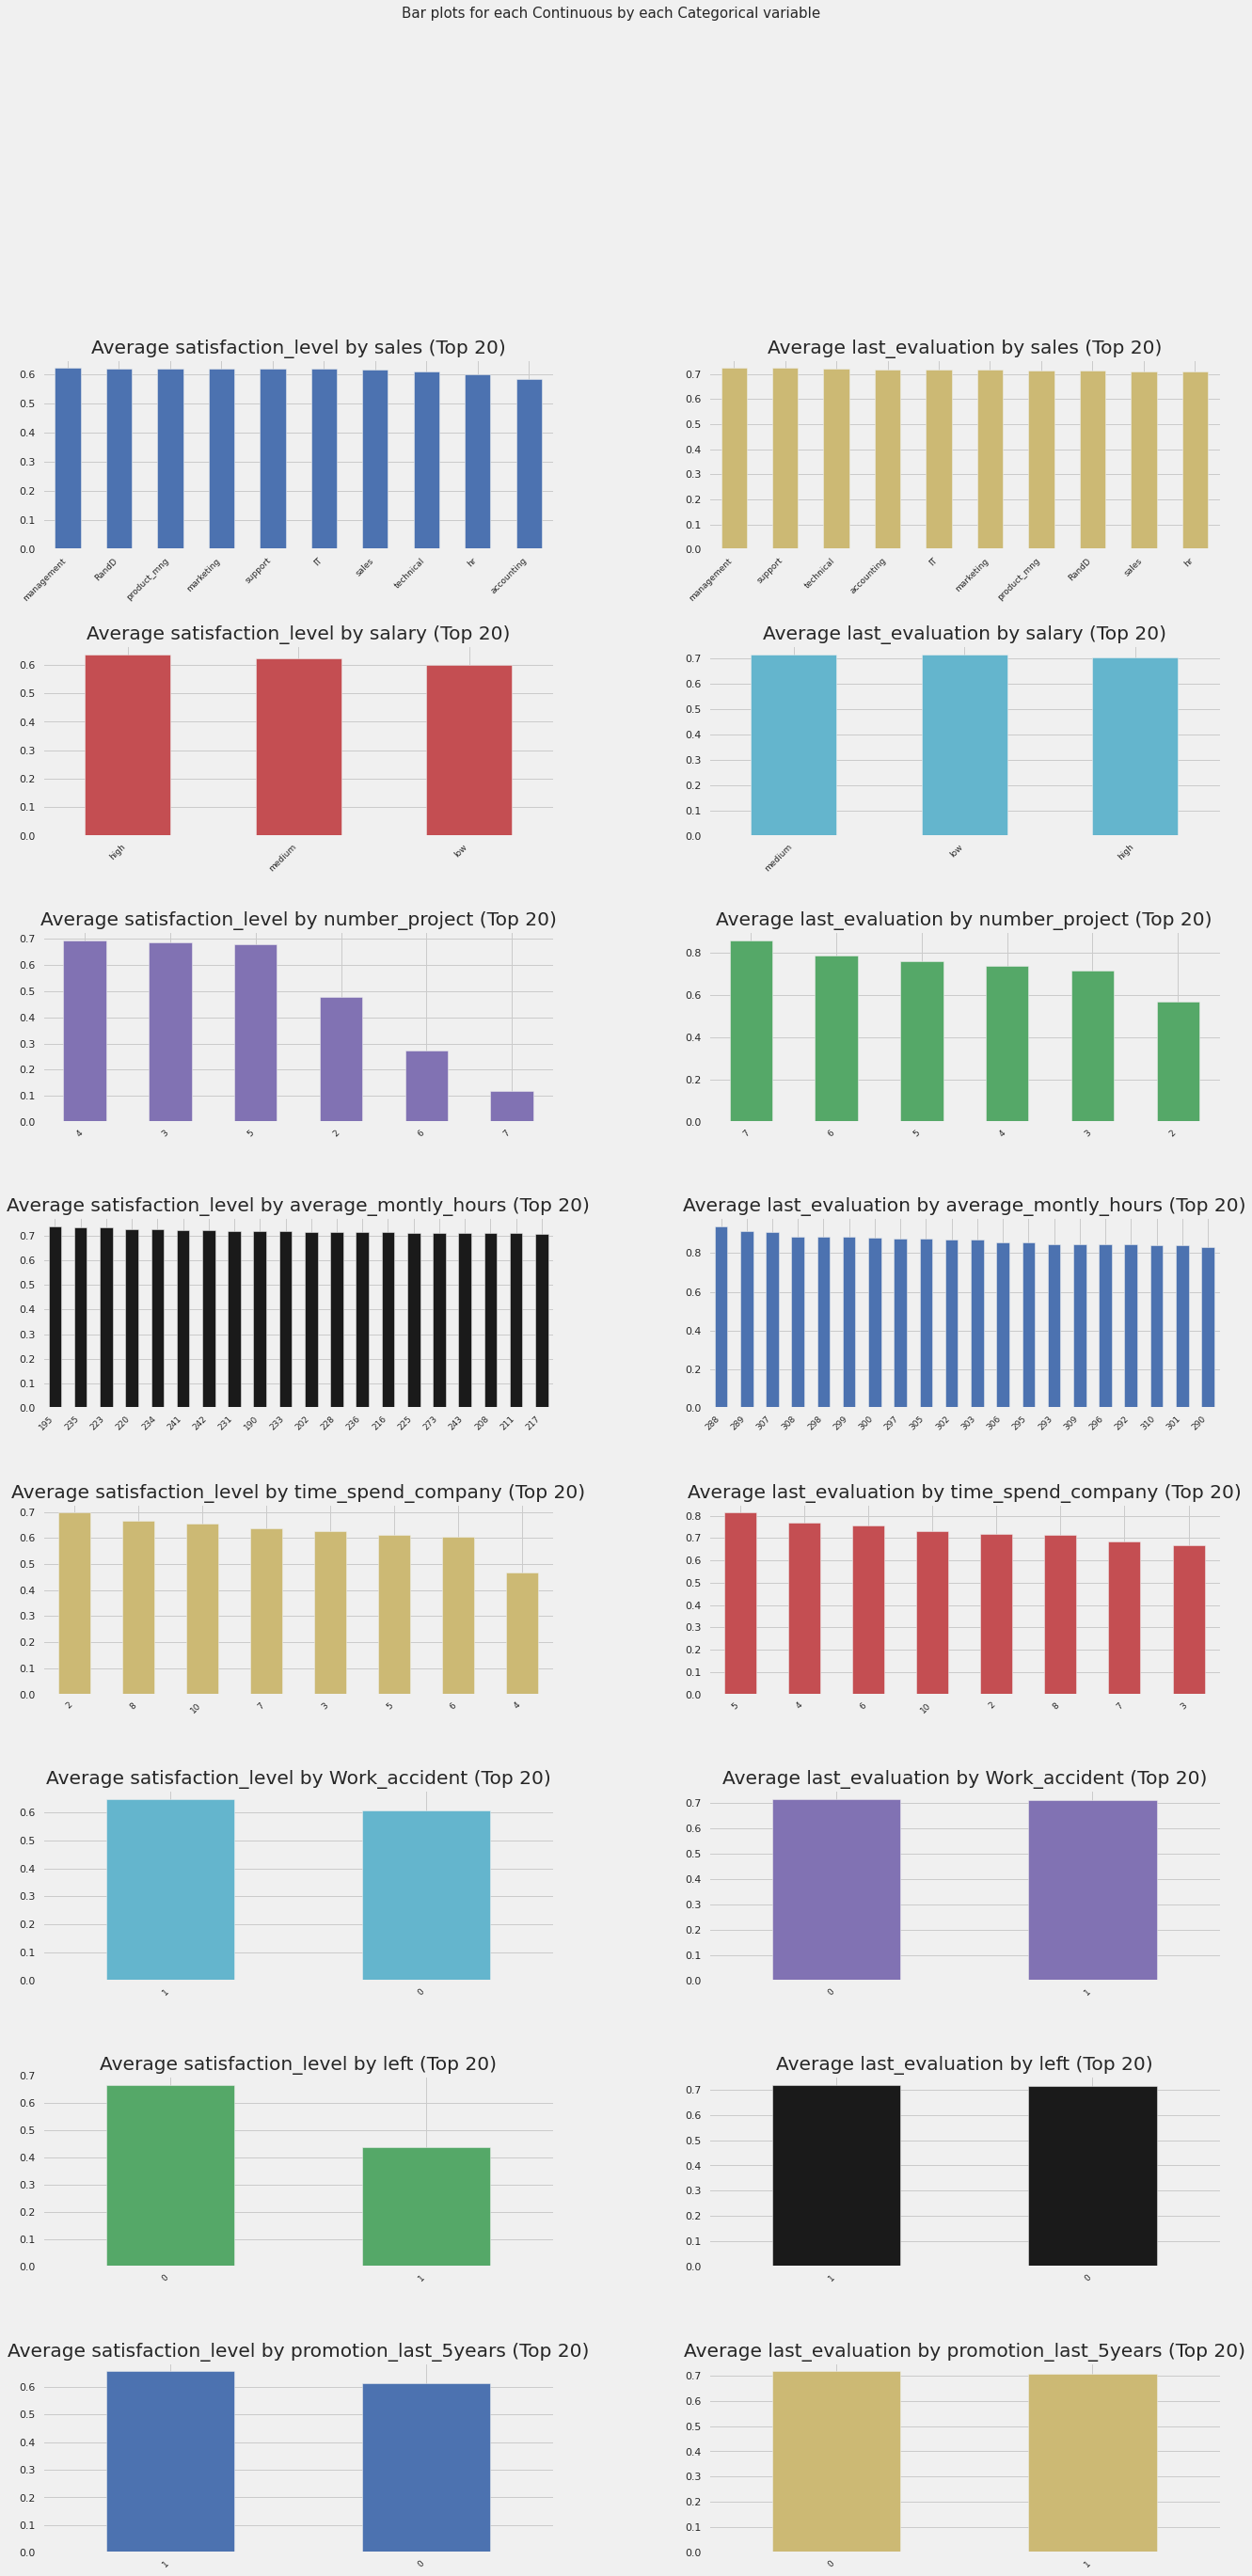

In [ ]:
AV.AutoViz('/content/HR_comma_sep.csv')

# Data Understanding

It is to expect that the target should depend on the salary. An employee with lower salary should have bigger probability to leave. This is also indicated in the diagram below.

kolom 'left' merupakan variable terikat (y), sisanya merupakan variable bebas (x). kolom 'sales' dan 'salary' harus dijadikan dalam bentuk one hot encoding.

## Data Preprocessing

In [ ]:
df.shape

(14999, 10)

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales_IT  \
0                   3              0     1                      0         0   
1                   6              0     1                      0         0   
2                   4              0     1                      0         0   
3                   5              0     1                      0         0   
4                   3              0     1                      0         0   

   sales_RandD  ...  sales_hr  sales_management  sales_marketing  \
0            0  ...         0                 0                0   
1            0  ...         0                 0                0   
2            0  ...         0                 0                0   
3            0  ...         0                 0                0   
4            0  ...         0                 0                0   

   sales_product_mng  sales_sales  sales_support  sales_technical  \
0                  0            1              0                0   
1                  0            1              0                0   
2                  0            1              0                0   
3                  0            1              0                0   
4                  0            1              0                0   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1  
2            0           0              1  
3            0           1              0  
4            0           1              0  

[5 rows x 21 columns]

In [ ]:
X = df.drop(['left'],1)
y = df['left']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
# Normalisasi data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_transform = scaler.fit_transform(X)

In [ ]:
X_transform = pd.DataFrame(X_transform, columns = X.columns)

In [ ]:
X_transform.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0            0.318681         0.265625             0.0              0.285047   
1            0.780220         0.781250             0.6              0.775701   
2            0.021978         0.812500             1.0              0.822430   
3            0.692308         0.796875             0.6              0.593458   
4            0.307692         0.250000             0.0              0.294393   

   time_spend_company  Work_accident  promotion_last_5years  sales_IT  \
0               0.125            0.0                    0.0       0.0   
1               0.500            0.0                    0.0       0.0   
2               0.250            0.0                    0.0       0.0   
3               0.375            0.0                    0.0       0.0   
4               0.125            0.0                    0.0       0.0   

   sales_RandD  sales_accounting  sales_hr  sales_management  sales_marketing  \
0          0.0               0.0       0.0               0.0              0.0   
1          0.0               0.0       0.0               0.0              0.0   
2          0.0               0.0       0.0               0.0              0.0   
3          0.0               0.0       0.0               0.0              0.0   
4          0.0               0.0       0.0               0.0              0.0   

   sales_product_mng  sales_sales  sales_support  sales_technical  \
0                0.0          1.0            0.0              0.0   
1                0.0          1.0            0.0              0.0   
2                0.0          1.0            0.0              0.0   
3                0.0          1.0            0.0              0.0   
4                0.0          1.0            0.0              0.0   

   salary_high  salary_low  salary_medium  
0          0.0         1.0            0.0  
1          0.0         0.0            1.0  
2          0.0         0.0            1.0  
3          0.0         1.0            0.0  
4          0.0         1.0            0.0

In [ ]:
X_transform.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.574542         0.556409        0.360611   
std              0.273220         0.267452        0.246518   
min              0.000000         0.000000        0.000000   
25%              0.384615         0.312500        0.200000   
50%              0.604396         0.562500        0.400000   
75%              0.802198         0.796875        0.600000   
max              1.000000         1.000000        1.000000   

       average_montly_hours  time_spend_company  Work_accident  \
count          14999.000000        14999.000000   14999.000000   
mean               0.490889            0.187279       0.144610   
std                0.233379            0.182517       0.351719   
min                0.000000            0.000000       0.000000   
25%                0.280374            0.125000       0.000000   
50%                0.485981            0.125000       0.000000   
75%                0.696262            0.250000       0.000000   
max                1.000000            1.000000       1.000000   

       promotion_last_5years      sales_IT   sales_RandD  sales_accounting  \
count           14999.000000  14999.000000  14999.000000      14999.000000   
mean                0.021268      0.081805      0.052470          0.051137   
std                 0.144281      0.274077      0.222981          0.220284   
min                 0.000000      0.000000      0.000000          0.000000   
25%                 0.000000      0.000000      0.000000          0.000000   
50%                 0.000000      0.000000      0.000000          0.000000   
75%                 0.000000      0.000000      0.000000          0.000000   
max                 1.000000      1.000000      1.000000          1.000000   

           sales_hr  sales_management  sales_marketing  sales_product_mng  \
count  14999.000000      14999.000000     14999.000000       14999.000000   
mean       0.049270          0.042003         0.057204           0.060137   
std        0.216438          0.200602         0.232239           0.237749   
min        0.000000          0.000000         0.000000           0.000000   
25%        0.000000          0.000000         0.000000           0.000000   
50%        0.000000          0.000000         0.000000           0.000000   
75%        0.000000          0.000000         0.000000           0.000000   
max        1.000000          1.000000         1.000000           1.000000   

        sales_sales  sales_support  sales_technical   salary_high  \
count  14999.000000   14999.000000     14999.000000  14999.000000   
mean       0.276018       0.148610         0.181345      0.082472   
std        0.447041       0.355715         0.385317      0.275092   
min        0.000000       0.000000         0.000000      0.000000   
25%        0.000000       0.000000         0.000000      0.000000   
50%        0.000000       0.000000         0.000000      0.000000   
75%        1.000000       0.000000         0.000000      0.000000   
max        1.000000       1.000000         1.000000      1.000000   

         salary_low  salary_medium  
count  14999.000000   14999.000000  
mean       0.487766       0.429762  
std        0.499867       0.495059  
min        0.000000       0.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        1.000000       1.000000  
max        1.000000       1.000000

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_transform,y,test_size = 0.2, random_state = 123)

# Data Modeling, Model Testing & Model evaluation

Pada bagian ini, kita akan menerapkan dengan bahasa python beberapa model yang telah kita pelajari yaitu :
1. k-Nearest Neighbor
2. Decision Tree
3. Logistic Regression
    
Beserta akan ada contoh **tuning hyperparameter** untuk svm dan ensemble

## k-Nearest Neighbor

k-Nearest Neighbor merupakan pemodelan yang memiliki konsep <br>
**bergantung terhadap tetangga terdekatnya**.<br>
Sehingga mampu mengklasifikasi dengan baik.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def evaluasi_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test,y_pred)

def is_left(model,X_test,y_test):
    y_pred = model.predict(X_test)
    return X_test, y_pred

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,10):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)

    eval = evaluasi_model(knn,X_test,y_test)
    print(eval)

0.9696666666666667
0.962
0.9503333333333334
0.946
0.9406666666666667
0.9463333333333334
0.9406666666666667
0.9413333333333334
0.938


In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

evaluasi_model(knn,X_test,y_test)

0.946

In [ ]:
import pickle

with open('model_knn.pickle', 'wb') as handle:
    pickle.dump(knn, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# testing saved file
with open('model_knn.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [ ]:
evaluasi_model(b,X_test,y_test)

0.946

In [ ]:
evaluasi_model(b,X_train,y_train)

0.9710809234102842

### Tuning Hyperparameter


In [ ]:
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]} # hati-hati pemilihan hyperparameter jangan terlalu banyak kombinasinya

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator=knn,
             param_grid=params,
             scoring = 'accuracy',
             n_jobs = 10, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=9), n_jobs=10,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'n_neighbors': 1}

In [ ]:
evaluasi_model(grid,X_test,y_test)

0.9696666666666667

## Decision Tree

Decision Tree merupakan pemodelan dengan cara membuat sebuah **pohon keputusan** <br>
Pohon ini bisa kita atur kedalamannya.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
evaluasi_model(dtc,X_train,y_train)

1.0

In [ ]:
evaluasi_model(dtc,X_test,y_test)

0.9826666666666667

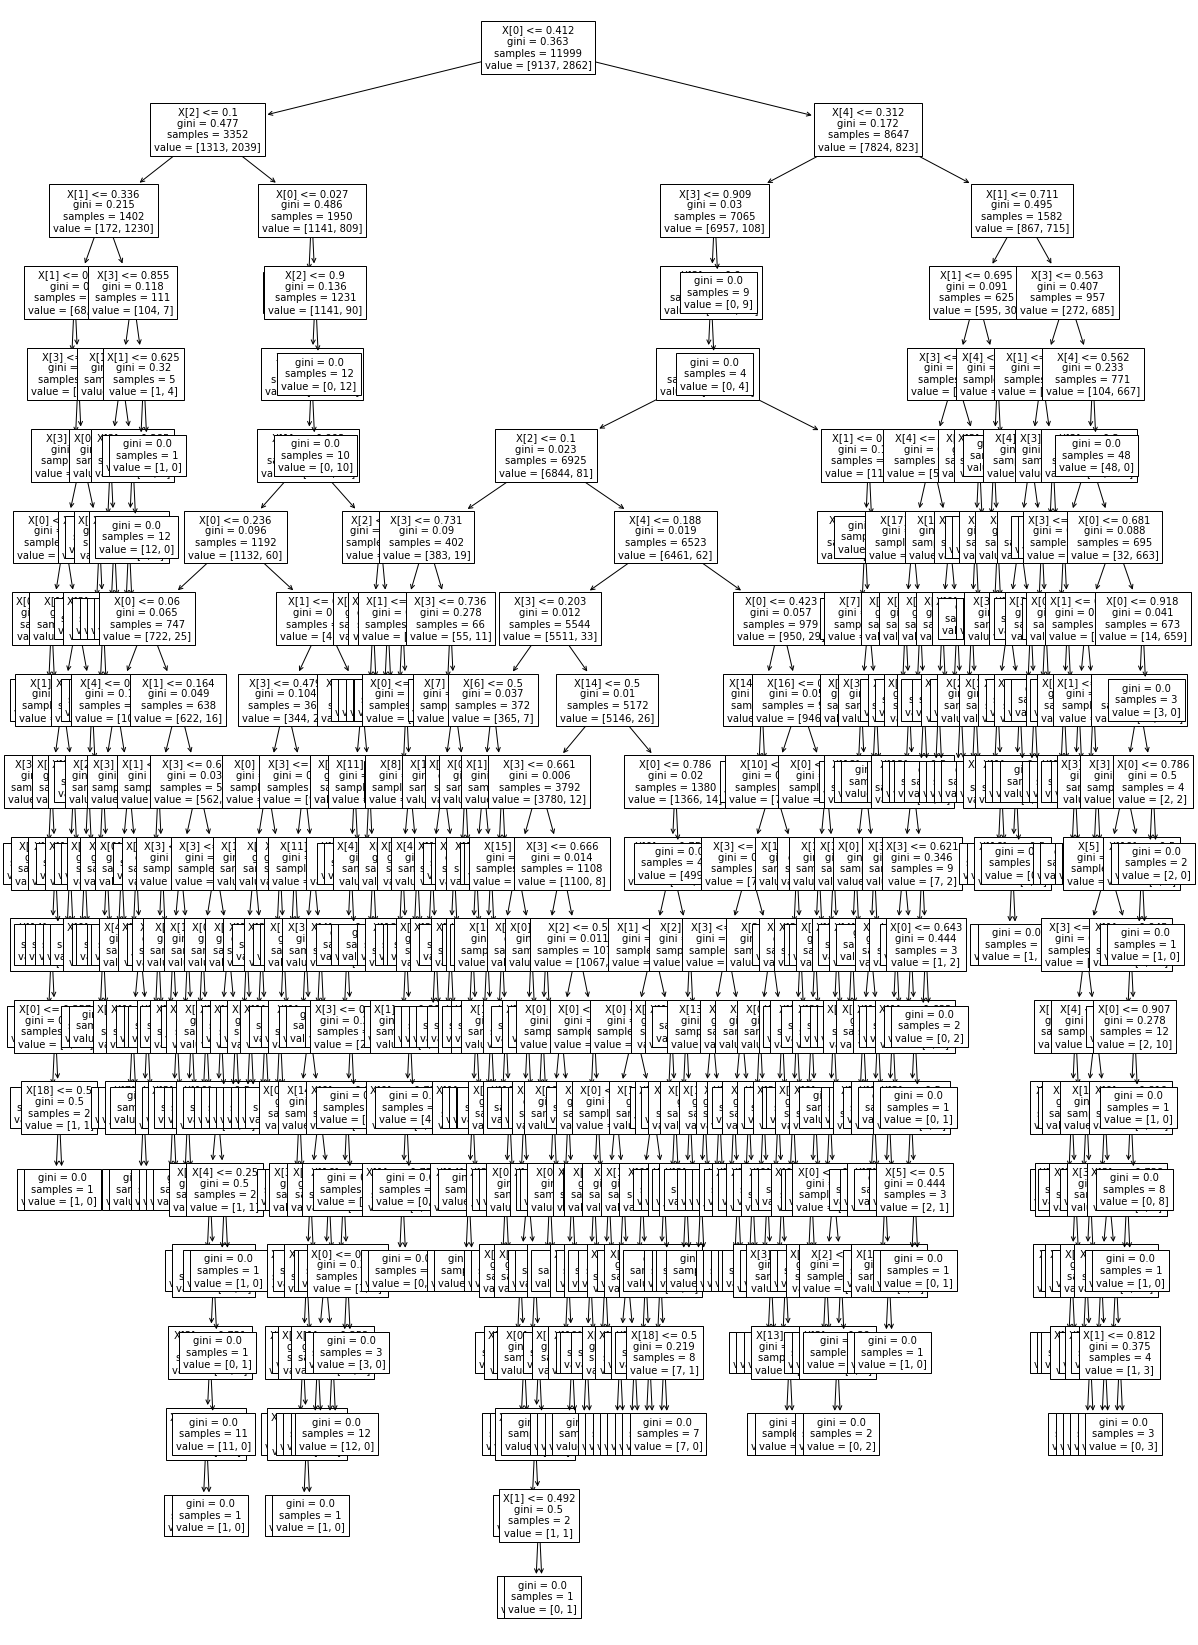

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
plt.figure(figsize=(20,30))
tree.plot_tree(dtc, fontsize=10)
plt.show()

In [ ]:
params = {'max_depth':[3,5,7,9,11,'max']} # hati-hati pemilihan hyperparameter jangan terlalu banyak kombinasinya

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator=dtc,
             param_grid=params,
             scoring = 'accuracy',
             n_jobs = 10, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

In [ ]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 305, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.war

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=10,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 'max']},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'max_depth': 11}

In [ ]:
evaluasi_model(grid,X_train,y_train)

0.9895824652054338

In [ ]:
evaluasi_model(grid,X_test,y_test)

0.9816666666666667

In [ ]:
is_left(grid,X_test,y_test)

(       satisfaction_level  last_evaluation  number_project  \
 6958             0.494505         0.484375             0.2   
 7534             0.692308         0.250000             0.2   
 2975             0.945055         0.390625             0.2   
 3903             0.758242         0.671875             0.2   
 8437             0.560440         0.062500             0.2   
 ...                   ...              ...             ...   
 1229             0.362637         0.296875             0.0   
 10593            0.571429         0.484375             0.4   
 12248            0.857143         0.859375             0.4   
 3147             0.439560         0.546875             0.2   
 6623             0.472527         0.468750             0.6   
 
        average_montly_hours  time_spend_company  Work_accident  \
 6958               0.271028               0.000            0.0   
 7534               0.219626               0.250            1.0   
 2975               0.799065             

## Logistic Regression

Decision Tree merupakan pemodelan dengan menggunakan konsep **regresi** <br>
Namun regresi yang digunakan adalah regresi yang telah ditransformasi untuk variable targetnya.

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
evaluasi_model(logreg,X_train,y_train)

0.7935661305108759

In [ ]:
evaluasi_model(logreg,X_test,y_test)

0.789

In [ ]:
params = {'C':[0.1,0.5,1,2,3]} # hati-hati pemilihan hyperparameter jangan terlalu banyak kombinasinya

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator=logreg,
             param_grid=params,
             scoring = 'accuracy',
             n_jobs = 10, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=10,
             param_grid={'C': [0.1, 0.5, 1, 2, 3]}, scoring='accuracy')

In [ ]:
grid.best_params_

{'C': 3}

In [ ]:
evaluasi_model(grid,X_train,y_train)

0.7933994499541629

In [ ]:
evaluasi_model(grid,X_test,y_test)

0.7896666666666666